<a href="https://colab.research.google.com/github/Biboswan/TrainingNN_PytorchIntro/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt



In [3]:
torch.manual_seed(7)

In [4]:
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),])

trainset = datasets.FashionMNIST('FashionMNSIT_data/',download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('FashionMNSIT_data/',download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



Processing...
Done!


In [0]:
images, labels = next(iter(trainloader))


In [0]:
print(images.shape)
print(labels.shape)
print(images[0])

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -0.0353,  0.2549, -0.0510, -0.0353,
           0.0039, -0.1216,  0.5216,  0.7333, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9922, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.7490,  0.1843,  0.5765,  0.2549,  0.3961,  0.1451,
          -0.0510,  0.0745,  0.5059,  0.4510, -0.1216, -0.9373, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7412,  0.0039,
           0.2706,  0.4902,  0.4510,  0.3255,  0.3490,  0.0745, -0.3725,
          -0.6549, -0.0667,  0.0902,  0.2157,  0.5059,  0.4510,  0.3490,
          -0.1765, -0.8902, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.3882,  0.4902,
   

tensor(-1.)


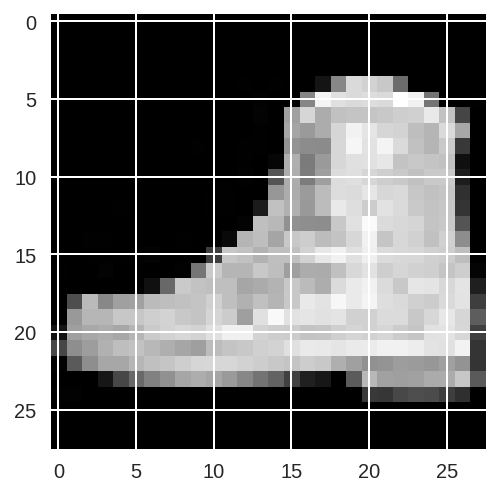

In [0]:
plt.imshow(images[4].numpy().squeeze(), cmap='Greys_r')
print(images[2][0][27][27])

In [0]:
from torch import optim
from torch import nn
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10)
                     )
#Should increase hidden layers as FMNIST dataset is complex
optimizer = optim.Adam(model.parameters(), lr=0.003) 
# or optim.Adam (faster fitting, different learning rates, gives momemtum...)

#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()
print('lenght of trainloader',len(trainloader))
epochs = 7
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
  # Clear the gradients or else gradients are accumulated from previous training pass
    output = model.forward(images)
    loss = criterion(output,labels)
    running_loss+=loss.item()
    loss.backward()
    optimizer.step()

  else:
    print('Training Loss:', running_loss/len(trainloader))       

lenght of trainloader 938
Training Loss: 0.5000270493408002
Training Loss: 0.3828372867789858
Training Loss: 0.3527474996568298
Training Loss: 0.32999269157521
Training Loss: 0.31960632926873817
Training Loss: 0.30236071202038195
Training Loss: 0.2945992953852931


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

Labels for reference: https://github.com/zalandoresearch/fashion-mnist#labels

tensor([[2.5182e-03, 1.3993e-03, 2.1403e-03, 9.0318e-01, 7.8082e-02, 1.9597e-05,
         1.2310e-02, 9.3779e-07, 3.5352e-04, 5.0554e-07]])


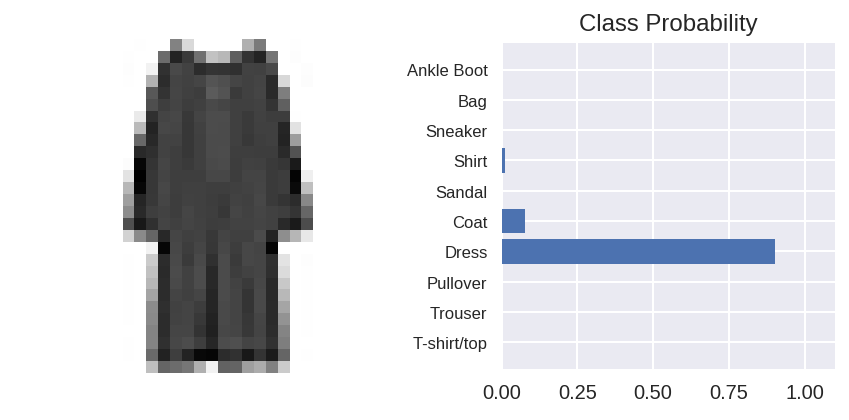

In [0]:
%matplotlib inline
import torch.nn.functional as F
images, labels = next(iter(trainloader))
img = images[14].view(1, 784)

#Turn off gradient to speed up this prediction checking part
with torch.no_grad():
  logits = model.forward(img)
  
ps = F.softmax(logits, dim=1)
print(ps)
#plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')
view_classify(img.view(1,28,28), ps, version='Fashion')  

**Inference and Validation**

In [0]:
images, labels = next(iter(testloader))
print(images.shape)
images = images.view(images.shape[0], -1)

with torch.no_grad():
  logits = model.forward(images)
#Get the class probabilities
ps = F.softmax(logits, dim=1)
print(torch.sum(ps, dim=1))
# dim=1 => rowise



torch.Size([64, 1, 28, 28])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
top_p, top_class = ps.topk(1,dim=1)
print(top_class[:10,:])

tensor([[0],
        [0],
        [2],
        [2],
        [6],
        [6],
        [6],
        [4],
        [0],
        [3]])


In [0]:
equals =  top_class == labels.view(*top_class.shape)
print(equals)

tensor([[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.uint8)


In [0]:
accuracy = torch.mean(equals.type(torch.FloatTensor)) # equals has byte datatype i.e uint8 but mean does work on byte
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 87.5%


In [0]:
a= [[2],
   [34],[44]]
b = [[33],[77]]
a+=b
print(a)
  

[[2], [34], [44], [33], [77]]


In [0]:
totalEquals = torch.tensor([], dtype=torch.uint8)
for images, labels in testloader:
  images = images.view(images.shape[0],-1)
  with torch.no_grad():
    logits = model.forward(images)
    #Get the class probabilities
    ps = F.softmax(logits, dim=1)
    top_p, top_class = ps.topk(1,dim=1)
    equals = top_class == labels.view(*top_class.shape)
    totalEquals = torch.cat((totalEquals,equals),0)
    batchAccuracy  = torch.mean(equals.type(torch.FloatTensor))
    print(f'batchAccuracy: {batchAccuracy.item()*100}%')
else:
  totalAcc = torch.mean(totalEquals.type(torch.FloatTensor))
  print(f'Total Accuracy: {totalAcc.item()*100}%')
  
  

batchAccuracy: 93.75%
batchAccuracy: 85.9375%
batchAccuracy: 82.8125%
batchAccuracy: 89.0625%
batchAccuracy: 93.75%
batchAccuracy: 87.5%
batchAccuracy: 89.0625%
batchAccuracy: 84.375%
batchAccuracy: 85.9375%
batchAccuracy: 76.5625%
batchAccuracy: 85.9375%
batchAccuracy: 90.625%
batchAccuracy: 79.6875%
batchAccuracy: 89.0625%
batchAccuracy: 90.625%
batchAccuracy: 82.8125%
batchAccuracy: 82.8125%
batchAccuracy: 85.9375%
batchAccuracy: 89.0625%
batchAccuracy: 89.0625%
batchAccuracy: 78.125%
batchAccuracy: 92.1875%
batchAccuracy: 92.1875%
batchAccuracy: 92.1875%
batchAccuracy: 92.1875%
batchAccuracy: 87.5%
batchAccuracy: 84.375%
batchAccuracy: 92.1875%
batchAccuracy: 81.25%
batchAccuracy: 79.6875%
batchAccuracy: 87.5%
batchAccuracy: 90.625%
batchAccuracy: 92.1875%
batchAccuracy: 81.25%
batchAccuracy: 90.625%
batchAccuracy: 93.75%
batchAccuracy: 90.625%
batchAccuracy: 82.8125%
batchAccuracy: 96.875%
batchAccuracy: 87.5%
batchAccuracy: 90.625%
batchAccuracy: 87.5%
batchAccuracy: 81.25%
batch

**VALIDATION**

In [6]:
from torch import optim
from torch import nn
import torch.nn.functional as F
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10)
                     )
#Should increase hidden layers as FMNIST dataset is complex
optimizer = optim.Adam(model.parameters(), lr=0.003) 
# or optim.Adam (faster fitting, different learning rates, gives momemtum...)

#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()
print('lenght of trainloader',len(trainloader))
epochs = 20
train_losses, test_losses = [], []
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
  # Clear the gradients or else gradients are accumulated from previous training pass
    output = model.forward(images)
    loss = criterion(output,labels)
    running_loss+=loss.item()
    loss.backward()
    optimizer.step()

  else:
    totalEquals = torch.tensor([], dtype=torch.uint8)
    test_loss = 0
    for images, labels in testloader:
      images = images.view(images.shape[0],-1)
      with torch.no_grad():
        logits = model.forward(images)
        #Get the class probabilities
        test_loss += criterion(logits, labels).item() 
        ps = F.softmax(logits, dim=1)
        top_p, top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        totalEquals = torch.cat((totalEquals,equals),0)
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    totalAcc = torch.mean(totalEquals.type(torch.FloatTensor))
    print(f'epoch: {e}')
    print(f'Test Accuracy: {totalAcc.item()*100}%')
    
    print('Training Loss:', running_loss/len(trainloader))
    print('Testing Loss:', test_loss/len(testloader))

lenght of trainloader 938
epoch: 0
Test Accuracy: 83.91000032424927%
Training Loss: 0.4963613745055473
Testing Loss: 0.4408726516612776
epoch: 1
Test Accuracy: 84.92000102996826%
Training Loss: 0.3846432344713953
Testing Loss: 0.4011312758277176
epoch: 2
Test Accuracy: 86.05999946594238%
Training Loss: 0.3529604022134977
Testing Loss: 0.3898331359693199
epoch: 3
Test Accuracy: 86.29000186920166%
Training Loss: 0.3277841291543263
Testing Loss: 0.3799515682610737
epoch: 4
Test Accuracy: 86.75000071525574%
Training Loss: 0.3167394339950926
Testing Loss: 0.3773017564586773
epoch: 5
Test Accuracy: 86.11000180244446%
Training Loss: 0.30345817185096396
Testing Loss: 0.3901132889993631
epoch: 6
Test Accuracy: 86.57000064849854%
Training Loss: 0.2911069056531514
Testing Loss: 0.3740134873207967
epoch: 7
Test Accuracy: 87.52999901771545%
Training Loss: 0.28245276325483565
Testing Loss: 0.35510004401966266
epoch: 8
Test Accuracy: 87.52999901771545%
Training Loss: 0.27244778671689124
Testing Loss:

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

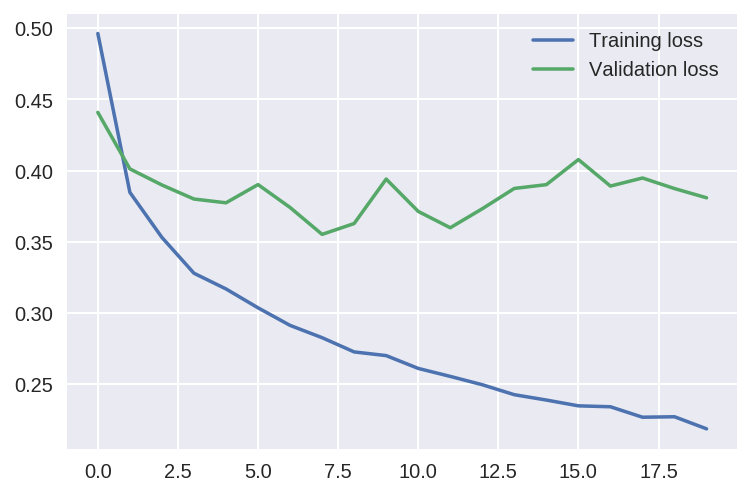

In [8]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

**Using Dropout**

In [11]:
from torch import optim
from torch import nn
import torch.nn.functional as F
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(64,10)
                     )
#Should increase hidden layers as FMNIST dataset is complex
optimizer = optim.Adam(model.parameters(), lr=0.003) 
# or optim.Adam (faster fitting, different learning rates, gives momemtum...)

#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()
print('lenght of trainloader',len(trainloader))
epochs = 20
train_losses, test_losses = [], []
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
  # Clear the gradients or else gradients are accumulated from previous training pass
    output = model.forward(images)
    loss = criterion(output,labels)
    running_loss+=loss.item()
    loss.backward()
    optimizer.step()

  else:
    totalEquals = torch.tensor([], dtype=torch.uint8)
    test_loss = 0
    model.eval()
    for images, labels in testloader:
      images = images.view(images.shape[0],-1)
      with torch.no_grad():
        logits = model.forward(images)
        #Get the class probabilities
        test_loss += criterion(logits, labels).item() 
        ps = F.softmax(logits, dim=1)
        top_p, top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        totalEquals = torch.cat((totalEquals,equals),0)
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    totalAcc = torch.mean(totalEquals.type(torch.FloatTensor))
    model.train()
    print(f'epoch: {e}')
    print(f'Test Accuracy: {totalAcc.item()*100}%')
    
    print('Training Loss:', running_loss/len(trainloader))
    print('Testing Loss:', test_loss/len(testloader))

lenght of trainloader 938
epoch: 0
Test Accuracy: 82.05000162124634%
Training Loss: 0.5829612889142433
Testing Loss: 0.47679799358556224
epoch: 1
Test Accuracy: 84.14999842643738%
Training Loss: 0.46340896956511396
Testing Loss: 0.4261782833725024
epoch: 2
Test Accuracy: 84.50000286102295%
Training Loss: 0.43659495419340094
Testing Loss: 0.41613694864093875
epoch: 3
Test Accuracy: 84.74000096321106%
Training Loss: 0.4205681201555073
Testing Loss: 0.41802220483114766
epoch: 4
Test Accuracy: 85.87999939918518%
Training Loss: 0.4036799362346308
Testing Loss: 0.3942011141093673
epoch: 5
Test Accuracy: 86.58000230789185%
Training Loss: 0.3905485955986387
Testing Loss: 0.37805760874869715
epoch: 6
Test Accuracy: 85.44999957084656%
Training Loss: 0.38061989148828523
Testing Loss: 0.4007447679900819
epoch: 7
Test Accuracy: 86.0700011253357%
Training Loss: 0.37283892203559243
Testing Loss: 0.399256670930583
epoch: 8
Test Accuracy: 86.44999861717224%
Training Loss: 0.3771077664549163
Testing Los

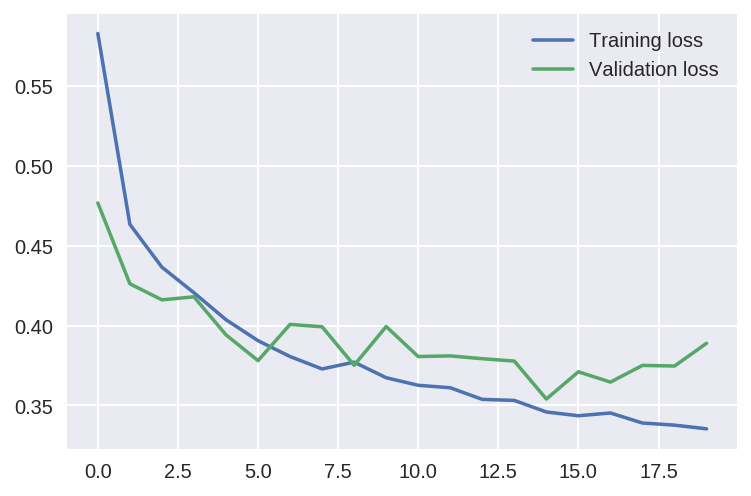

In [13]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [20]:
print("Our model:\n\n", model,'\n')
print("The state dict keys:\n\n", model.state_dict().keys())
print(model.state_dict())

Our model:

 Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=64, out_features=10, bias=True)
) 

The state dict keys:

 odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias'])
OrderedDict([('0.weight', tensor([[-0.1977, -0.2037, -0.1665,  ..., -0.2903, -0.2370, -0.2017],
        [ 0.2806,  0.2763,  0.2806,  ...,  0.3373,  0.1607,  0.2669],
        [ 0.2186,  0.2128,  0.1894,  ...,  0.1928,  0.2113,  0.2164],
        ...,
        [ 0.0316,  0.0316,  0.0259,  ...,  0.2059,  0.0968,  0.0648],
        [ 0.1446,  0.1802,  0.1884,  ...,  0.0987,  0.1665,  0.1495],
        [ 0.1295,  0.1394,  0.0920,  ...,  0.0882,  0.1673,  0.1350]])), ('0.bias', tensor([ 0.2119, -0.3110, -0.1963, -0.1473,  0.0149, -0.1118, -0.0738, -0.2344,
        -0.3372, -0.0544, -0.1662, -0.1901, -0.3209, -0.2794, -0.04

In [0]:
torch.save(model.state_dict(),'checkpoint.pth')
state_dict = torch.load('checkpoint.pth')
model.load_state_dict(state_dict)


In [19]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

AttributeError: ignored

In [22]:
import fc_model

ModuleNotFoundError: ignored